# Generation For NLP Analysis

Train 데이터셋에 대한 선택적 데이터 분석을 시행했습니다.

In [19]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [5]:
data = pd.read_csv("../train.csv")  


In [6]:
print("데이터 기본 정보:")
data.info()

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2031 non-null   object 
 1   paragraph      2031 non-null   object 
 2   problems       2031 non-null   object 
 3   question_plus  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 63.6+ KB


In [7]:

print("\n데이터 샘플:")
display(data.head())


데이터 샘플:


,id,paragraph,problems,question_plus
0,generation-for-nlp-425,"상소하여 아뢰기를 , “신이 좌참 찬 송준길이 올린 차자를 보았는데 , 상복(喪服)...",{'question': '상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두...,NaN
1,generation-for-nlp-426,"(가)은/는 의병계열과 애국계몽 운동 계열의 비밀결사가 모여 결성된 조직으로, 총사...","{'question': '(가)에 대한 설명으로 옳지 않은 것은?', 'choice...",NaN
2,generation-for-nlp-427,나는 삼한(三韓) 산천의 음덕을 입어 대업을 이루었다.(가)는/은 수덕(水德)이 순...,"{'question': '(가) 지역에 대한 설명으로 옳은 것은?', 'choice...",NaN
3,generation-for-nlp-428,이 날 소정방이 부총관 김인문 등과 함께 기 벌포에 도착하여 백제 군사와 마주쳤다....,"{'question': '밑줄 친 ‘그’에 대한 설명으로 옳은 것은?', 'choi...",NaN
4,generation-for-nlp-429,"선비들 수만 명이 대궐 앞에 모여 만 동묘와 서원을 다시 설립할 것을 청하니, (가...","{'question': '(가) 인물이 추진한 정책으로 옳지 않은 것은?', 'ch...",NaN


### 결측치 확인

In [8]:
print("\n결측치 확인:")
print(data.isnull().sum())


결측치 확인:
id                  0
paragraph           0
problems            0
question_plus    2031
dtype: int64


### 데이터 길이 확인

In [9]:

data['paragraph_length'] = data['paragraph'].apply(lambda x: len(str(x)))
print("\nparagraph 열의 텍스트 길이 통계:")
print(data['paragraph_length'].describe())


paragraph 열의 텍스트 길이 통계:
count    2031.000000
mean      735.324471
std       462.595621
min        15.000000
25%       407.500000
50%       699.000000
75%      1014.500000
max      2017.000000
Name: paragraph_length, dtype: float64


### 텍스트 길이 분포 시각화

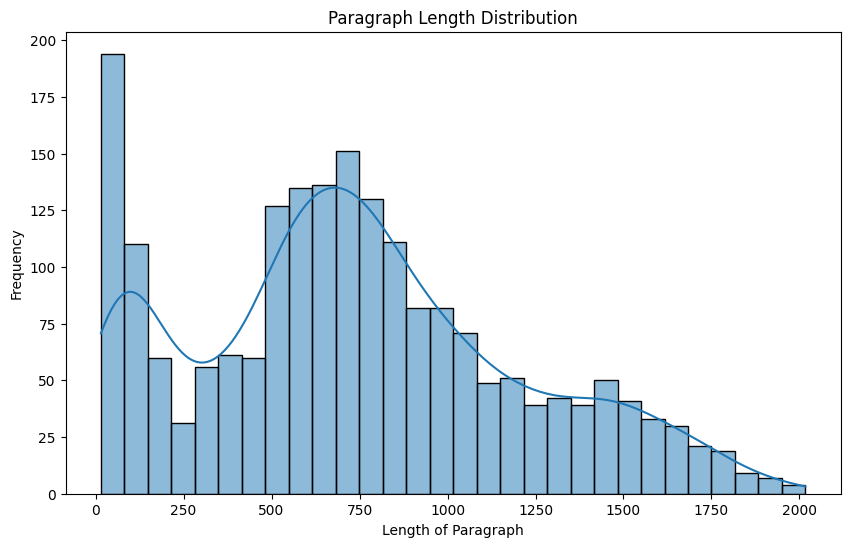

In [10]:
# 텍스트 길이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data['paragraph_length'], kde=True, bins=30)
plt.title('Paragraph Length Distribution')
plt.xlabel('Length of Paragraph')
plt.ylabel('Frequency')
plt.show()

In [18]:
# problems 열의 내용 분석
print("\nproblems 열 데이터 분석:")
data['problems_parsed'] = data['problems'].apply(eval)  # 문자열을 딕셔너리로 변환
data['question'] = data['problems_parsed'].apply(lambda x: x.get('question'))
data['choices'] = data['problems_parsed'].apply(lambda x: x.get('choices'))
data['answer'] = data['problems_parsed'].apply(lambda x: x.get('answer'))


problems 열 데이터 분석:


In [21]:
# question 길이 및 choices 수 분석
data['question_length'] = data['question'].apply(lambda x: len(str(x)))
data['choices_count'] = data['choices'].apply(lambda x: len(x) if isinstance(x, list) else 0)
print("\nquestion 길이 통계:")
print(data['question_length'].describe())
print("\nchoices 개수 통계:")
print(data['choices_count'].value_counts())


question 길이 통계:
count    2031.000000
mean       39.241753
std        12.975655
min        10.000000
25%        30.000000
50%        37.000000
75%        46.000000
max       152.000000
Name: question_length, dtype: float64

choices 개수 통계:
choices_count
5    1239
4     792
Name: count, dtype: int64


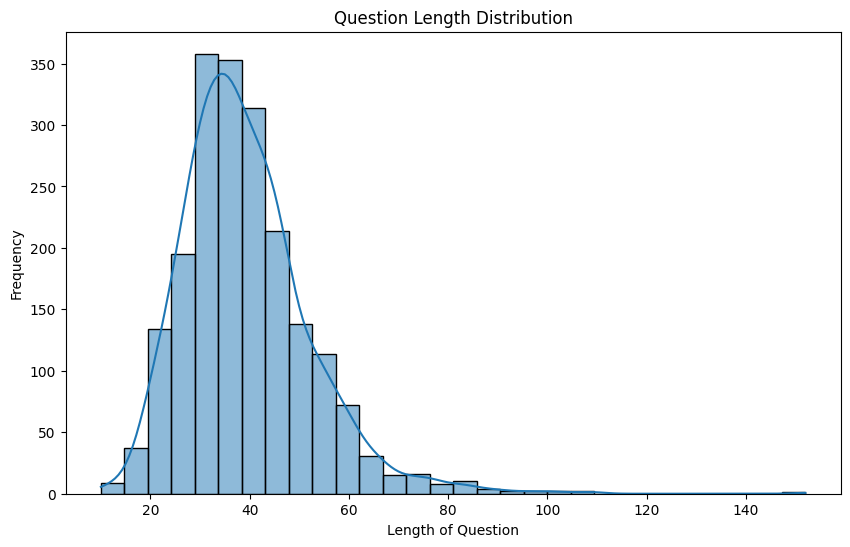

In [22]:
# question 길이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data['question_length'], kde=True, bins=30)
plt.title('Question Length Distribution')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')
plt.show()


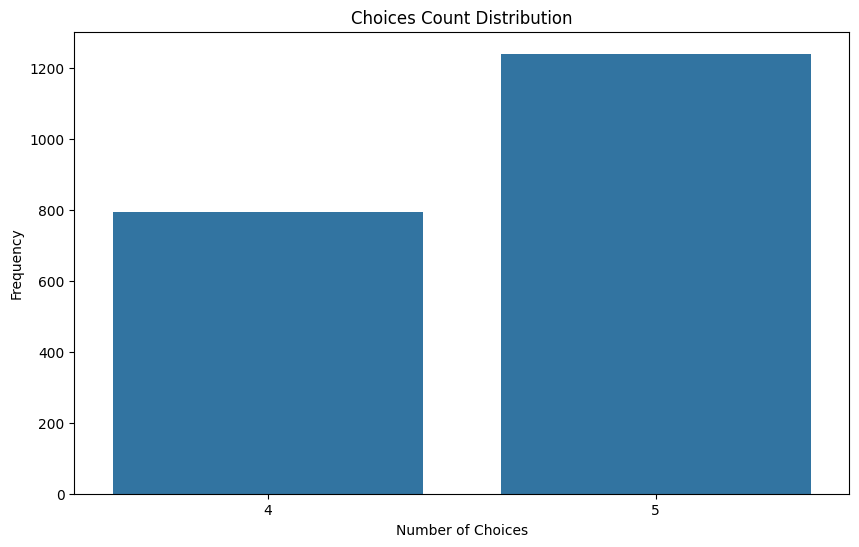

In [23]:
# choices 개수 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x="choices_count", data=data)
plt.title('Choices Count Distribution')
plt.xlabel('Number of Choices')
plt.ylabel('Frequency')
plt.show()


In [30]:
# answer 열의 값 분포 확인
answer_counts = data['answer'].value_counts()
print("\nAnswer Distribution:")
print(answer_counts)


Answer Distribution:
answer
1    948
2    450
3    319
4    283
5     31
Name: count, dtype: int64


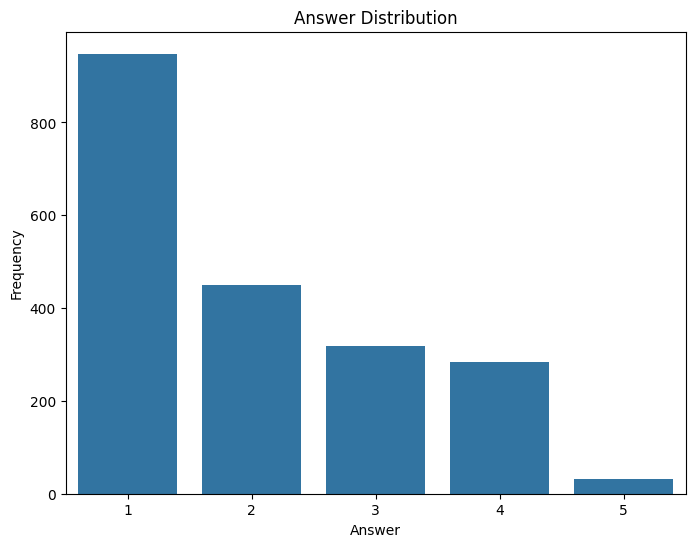

In [31]:
# answer 분포 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=answer_counts.index, y=answer_counts.values)
plt.title('Answer Distribution')
plt.xlabel('Answer')
plt.ylabel('Frequency')
plt.show()

Answer Distribution by Choices Count:


answer,1,2,3,4,5
choices_count,,,,,
4,183.0,185.0,203.0,221.0,0.0
5,765.0,265.0,116.0,62.0,31.0


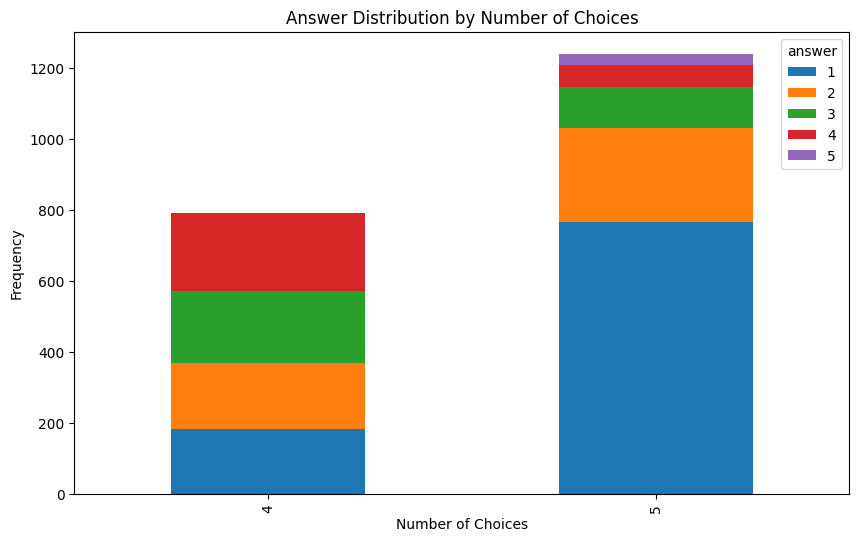

In [32]:
# choices_count 별로 answer 분포 분석
answer_distribution_by_choices = data.groupby(['choices_count', 'answer']).size().unstack().fillna(0)
print("Answer Distribution by Choices Count:")
display(answer_distribution_by_choices)

# 시각화
answer_distribution_by_choices.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Answer Distribution by Number of Choices")
plt.xlabel("Number of Choices")
plt.ylabel("Frequency")
plt.show()

### 정답 위치의 상대적 비율

Answer Ratio by Choices Count:


answer,1,2,3,4,5
choices_count,,,,,
4,0.231061,0.233586,0.256313,0.27904,0.00000
5,0.617433,0.213882,0.093624,0.05004,0.02502


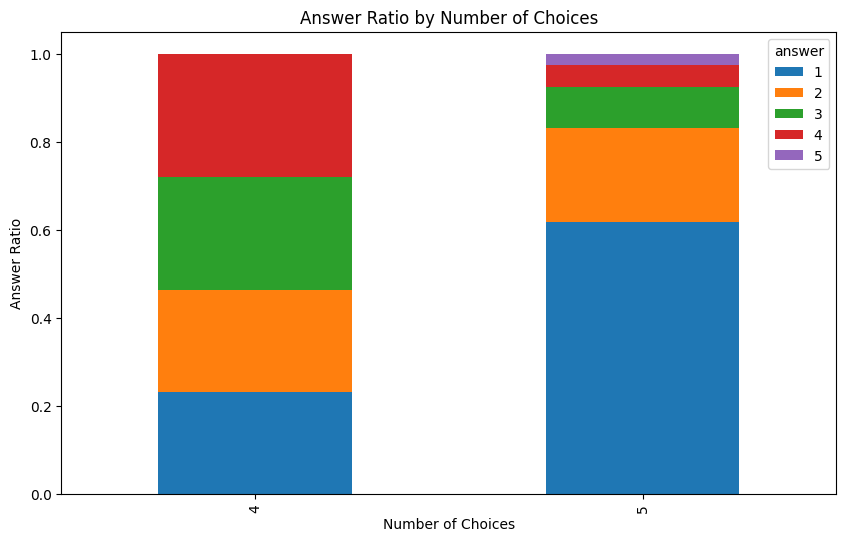

In [33]:
# choices_count가 4일 때와 5일 때의 answer 비율 계산
answer_ratio_by_choices = answer_distribution_by_choices.div(answer_distribution_by_choices.sum(axis=1), axis=0)
print("Answer Ratio by Choices Count:")
display(answer_ratio_by_choices)

# 시각화
answer_ratio_by_choices.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Answer Ratio by Number of Choices")
plt.xlabel("Number of Choices")
plt.ylabel("Answer Ratio")
plt.show()

In [ ]:
from scipy.stats import entropy

# choices_count별 정답 위치의 엔트로피 계산
def calculate_bias_index(group):
    prob_dist = group.value_counts(normalize=True)
    return entropy(prob_dist, base=2)  # 엔트로피 기반 편향 지수

bias_index = data.groupby('choices_count')['answer'].apply(calculate_bias_index)
print("Bias Index by Number of Choices:")
print(bias_index)

Bias Index by Number of Choices:
choices_count
4    1.995685
5    1.574676
Name: answer, dtype: float64


In [24]:
# question_plus 열의 내용 및 길이 분석
data['question_plus_length'] = data['question_plus'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
print("\nquestion_plus 길이 통계:")
print(data['question_plus_length'].describe())


question_plus 길이 통계:
count    2031.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: question_plus_length, dtype: float64


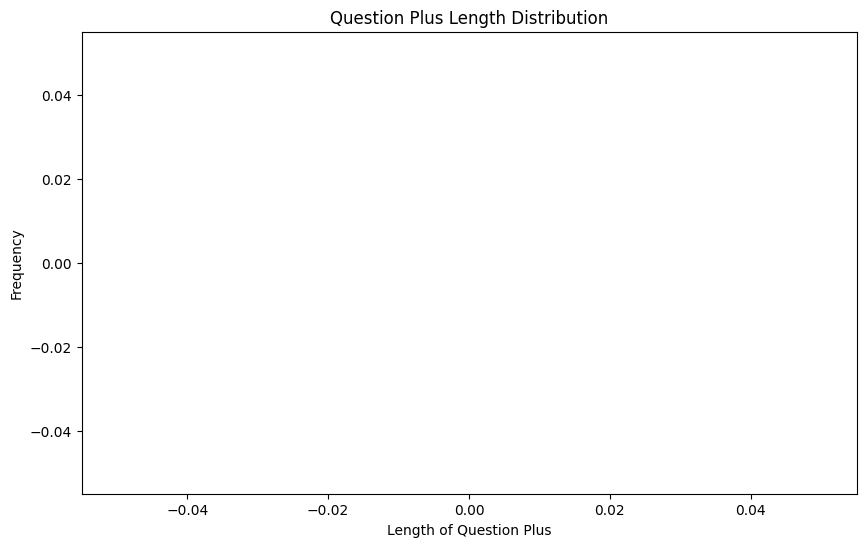

In [25]:
# question_plus 길이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data[data['question_plus_length'] > 0]['question_plus_length'], kde=True, bins=30)
plt.title('Question Plus Length Distribution')
plt.xlabel('Length of Question Plus')
plt.ylabel('Frequency')
plt.show()

### 데이터 형식 확인

In [11]:
print("\nproblems 열의 데이터 샘플:")
display(data['problems'].head())


problems 열의 데이터 샘플:


0    {'question': '상소한 인물이 속한 붕당에 대한 설명으로 옳은 것만을 모두...
1    {'question': '(가)에 대한 설명으로 옳지 않은 것은?', 'choice...
2    {'question': '(가) 지역에 대한 설명으로 옳은 것은?', 'choice...
3    {'question': '밑줄 친 ‘그’에 대한 설명으로 옳은 것은?', 'choi...
4    {'question': '(가) 인물이 추진한 정책으로 옳지 않은 것은?', 'ch...
Name: problems, dtype: object

In [12]:
print("\nquestion_plus 열의 데이터 샘플:")
display(data['question_plus'].head())



question_plus 열의 데이터 샘플:


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: question_plus, dtype: float64

### 고유 값 개수

In [13]:
# 고유 값 개수 확인 (유일한 ID 분석을 위해)
print("\nid 열의 고유 값 개수 확인:")
print(f"ID 열의 고유 값 개수: {data['id'].nunique()}")



id 열의 고유 값 개수 확인:
ID 열의 고유 값 개수: 2031


## 16진수 코드와 웹 인코딩 값 탐색


In [26]:
# 16진수 코드 (\x로 시작) 개수 확인
data['hex_code_count'] = data['paragraph'].apply(lambda x: len(re.findall(r'\\x[0-9A-Fa-f]{2}', str(x))))
print("\n16진수 코드가 포함된 행 수:", (data['hex_code_count'] > 0).sum())
print("총 16진수 코드 개수:", data['hex_code_count'].sum())


16진수 코드가 포함된 행 수: 0
총 16진수 코드 개수: 0


In [27]:
# 웹 인코딩 (%로 시작) 개수 확인
data['web_encoding_count'] = data['paragraph'].apply(lambda x: len(re.findall(r'%[0-9A-Fa-f]{2}', str(x))))
print("\n웹 인코딩 값이 포함된 행 수:", (data['web_encoding_count'] > 0).sum())
print("총 웹 인코딩 값 개수:", data['web_encoding_count'].sum())


웹 인코딩 값이 포함된 행 수: 0
총 웹 인코딩 값 개수: 0


/tmp/ipykernel_224544/1497895396.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


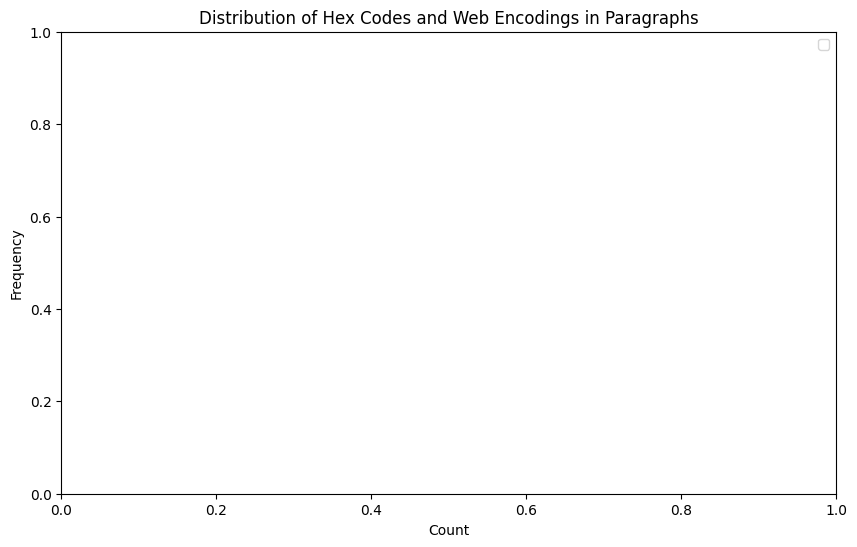

In [28]:
# 16진수 코드와 웹 인코딩 값 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data[data['hex_code_count'] > 0]['hex_code_count'], bins=30, color='blue', label='Hex Codes')
sns.histplot(data[data['web_encoding_count'] > 0]['web_encoding_count'], bins=30, color='green', label='Web Encodings')
plt.title('Distribution of Hex Codes and Web Encodings in Paragraphs')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# 특수 코드 패턴 탐지 함수 정의
def detect_special_codes(text_row):
    text = text_row['paragraph'] + ' ' + text_row['problems']
    hex_codes = re.findall(r'\\x[0-9A-Fa-f]{2}', str(text))  # 16진수 코드 탐지 (\x00 형식)
    web_encodings = re.findall(r'%[0-9A-Fa-f]{2}', str(text))  # 웹 인코딩 탐지 (%20 형식)
    non_breaking_spaces = re.findall(r'\xa0', str(text))  # 비슷 공백 탐지 (\xa0)
    
    return {
        'hex_code_count': len(hex_codes),
        'web_encoding_count': len(web_encodings),
        'nbsp_count': len(non_breaking_spaces)
    }

# paragraph 데이터에 적용하여 결과 컬럼 생성
data['paragraph_special_code_counts'] = data['paragraph'].apply(detect_special_codes)

# 결과 분해하여 별도의 컬럼으로 저장
data['paragraph_hex_code_count'] = data['paragraph_special_code_counts'].apply(lambda x: x['hex_code_count'])
data['paragraph_web_encoding_count'] = data['paragraph_special_code_counts'].apply(lambda x: x['web_encoding_count'])
data['paragraph_nbsp_count'] = data['paragraph_special_code_counts'].apply(lambda x: x['nbsp_count'])

# 특수 코드 빈도 출력
print("16진수 코드 포함 행 수:", (data['hex_code_count'] > 0).sum())
print("웹 인코딩 포함 행 수:", (data['web_encoding_count'] > 0).sum())
print("비슷 공백 포함 행 수:", (data['nbsp_count'] > 0).sum())
print("\n총 16진수 코드 개수:", data['hex_code_count'].sum())
print("총 웹 인코딩 개수:", data['web_encoding_count'].sum())
print("총 비슷 공백 개수:", data['nbsp_count'].sum())

# 결과 확인
data[['paragraph', 'hex_code_count', 'web_encoding_count', 'nbsp_count']].head()

: 

## 그 외 이상치 분석